In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

train_df = pd.read_csv("C:/Users/praan/Desktop/pvlab/data/mnist_test.csv")
test_df = pd.read_csv("C:/Users/praan/Desktop/pvlab/data/mnist_train.csv")

X_train = train_df.iloc[:, 1:].values / 255.0
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values


In [5]:

# Binary conversion
y_train_bin = (y_train == 0).astype(int)
y_test_bin = (y_test == 0).astype(int)


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_bin)

y_pred_lin = lin_reg.predict(X_test)

mse = mean_squared_error(y_test_bin, y_pred_lin)
print("Mean Squared Error (Linear Regression):", mse)


Mean Squared Error (Linear Regression): 28.345387475513867


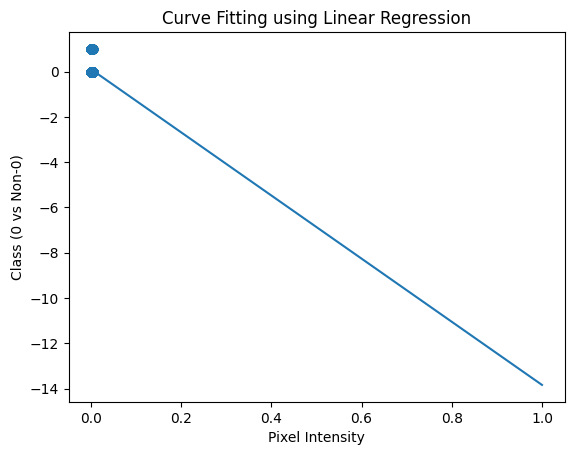

In [9]:
pixel_index = 100  # any pixel from 0–783

X_pixel_train = X_train[:, pixel_index].reshape(-1, 1)
X_pixel_test = X_test[:, pixel_index].reshape(-1, 1)

lin_pixel = LinearRegression()
lin_pixel.fit(X_pixel_train, y_train_bin)

x_curve = np.linspace(0, 1, 300).reshape(-1, 1)
y_curve = lin_pixel.predict(x_curve)

plt.figure()
plt.scatter(X_pixel_test, y_test_bin, alpha=0.3)
plt.plot(x_curve, y_curve)
plt.xlabel("Pixel Intensity")
plt.ylabel("Class (0 vs Non-0)")
plt.title("Curve Fitting using Linear Regression")
plt.show()


In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_bin, y_pred_lin)
print("R-squared (R²):", r2)

R-squared (R²): -317.588852543698


In [17]:
r_value = np.corrcoef(y_test_bin, y_pred_lin)[0, 1]
print("R value (Correlation):", r_value)


R value (Correlation): 0.04300762571990815


In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    n_jobs=-1,
    class_weight="balanced"
)
log_reg.fit(X_train, y_train_bin)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]


c:\Users\praan\Desktop\pvlab\pvl\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score
)
accuracy = accuracy_score(y_test_bin, y_pred)
precision = precision_score(y_test_bin, y_pred)
recall = recall_score(y_test_bin, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)


Accuracy : 0.9533166666666667
Precision: 0.7050170738114001
Recall   : 0.906297484382914


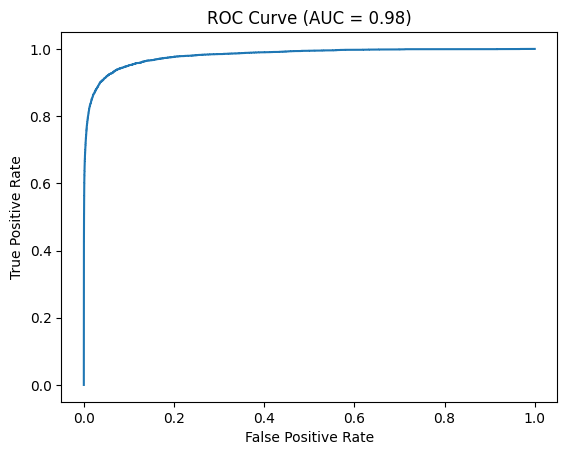

In [13]:
from sklearn.metrics import (
    auc,
    roc_curve
)
fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")
plt.show()
